# Modul 6 Praktikum Sains Data: K-Nearest Neighbor, K-Means Clustering

Kembali ke [Sains Data](./saindat2024genap.qmd)

## K-Nearest Neighbor

![](./gambar/knn.jpg)

K-Nearest neighbor adalah salah satu jenis algoritma supervised learning. Biasanya, algoritma ini digunakan untuk masalah klasifikasi.
Kelas dari data tersebut ditentukan dari sejumlah k titik yang berperan "tetangga". Pada gambar di atas, ketika k = 3, bintang akan diklasifikasikan sebagai kelas ungu, sebab mayoritas dari tetangganya adalah ungu. Sedangkan, ketika k = 6, bintang akan diklasifikasikan sebagai kelas kuning. 

In [2]:
#import modul
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### Data

Pada module kali ini, akan digunakan data csv teleCust1000t (`teleCust1000t.csv`) yang bisa didownload dari:

- [Direct link (langsung dari GitHub Pages ini)](./teleCust1000t.csv)
- Kaggle: <https://www.kaggle.com/code/zohaib123/telecusts-prediction-k-nearest-neighbors>

In [2]:
 #membaca dataset
df = pd.read_csv('./teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
#menghitung jumlah anggota tiap kelas
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

array([[<Axes: title={'center': 'income'}>]], dtype=object)

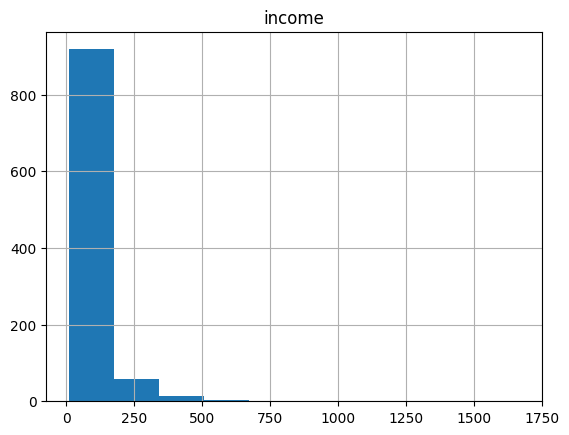

In [4]:
 #melihat sebaran income dengan histogram
df.hist(column='income')

In [10]:
#melihat 4 row pertama
X = df.drop(columns="custcat")
X.head(4)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,2,13,44,1,9,64.0,4,5,0.0,0,2
1,3,11,33,1,7,136.0,5,5,0.0,0,6
2,3,68,52,1,24,116.0,1,29,0.0,1,2
3,2,33,33,0,12,33.0,2,0,0.0,1,1


In [12]:
#melihat kelas dari 4 row pertama
y = df['custcat']
y.head(4)

0    1
1    4
2    3
3    1
Name: custcat, dtype: int64

### Preprocessing: normalisasi

Normalisasi adalah melakukan *scaling* pada keseluruhan data sehingga berada dalam rentang interval $[0, 1]$. Normalisasi bisa meningkatkan akurasi KNN karena

- data semua fitur berada di rentang yang sama, sehingga tidak ada bias (bias dalam artian lebih memperhatikan fitur lain karena rentangnya lebih besar sehingga perhitungan jarak menjadi lebih dipengaruhi oleh fitur lain itu)
- bilangan *floating-point* paling presisi di interval $[0, 1]$

`sklearn` menyediakan `class` untuk normalisasi bernama `MinMaxScaler`. Sebenarnya *min-max scaler* ini bisa diubah intervalnya selain $[0,1]$, dengan mengubah parameter `feature_range=(0, 1)` tetapi tidak kita lakukan

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
#normalize data
X_minmax = MinMaxScaler(feature_range=(0, 1))
X_minmax.fit(X)
X_sc = X_minmax.transform(X.astype(float))

In [20]:
X_sc[0:4]

array([[0.5       , 0.16901408, 0.44067797, 1.        , 0.16363636,
        0.0331525 , 0.75      , 0.10638298, 0.        , 0.        ,
        0.14285714],
       [1.        , 0.14084507, 0.25423729, 1.        , 0.12727273,
        0.07655214, 1.        , 0.10638298, 0.        , 0.        ,
        0.71428571],
       [1.        , 0.94366197, 0.57627119, 1.        , 0.43636364,
        0.06449668, 0.        , 0.61702128, 0.        , 1.        ,
        0.14285714],
       [0.5       , 0.45070423, 0.25423729, 0.        , 0.21818182,
        0.01446655, 0.25      , 0.        , 0.        , 1.        ,
        0.        ]])

### Train test split

In [21]:
from sklearn.model_selection import train_test_split

In [25]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [26]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(800, 11)
(800,)
(200, 11)
(200,)


### Membuat model

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
#membuat model dengan k = 4
k = 4
tele_KNN = KNeighborsClassifier(n_neighbors = k)
tele_KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

### Prediksi

In [28]:
#hasil prediksi
y_pred = tele_KNN.predict(X_test)
y_pred[0:5]

array([3, 2, 1, 3, 1])

In [29]:
#kelas sebenarnya
y_test[0:5]

521    2
737    1
740    2
660    3
411    1
Name: custcat, dtype: int64

### Evaluasi Model

In [30]:
from sklearn import metrics

In [31]:
#menghitung akurasi
metrics.accuracy_score(y_test, y_pred)

0.3

### Membuat model dengan k lainnya

In [32]:
#membuat model dengan k = 6
k = 6
tele_KNN_6 = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)

In [33]:
#hasil prediksi
y_pred_6 = tele_KNN_6.predict(X_test)
y_pred_6[0:5]

array([3, 2, 1, 3, 1])

In [34]:
#kelas sebenarnya
y_test[0:5]

521    2
737    1
740    2
660    3
411    1
Name: custcat, dtype: int64

In [36]:
#akurasi
metrics.accuracy_score(y_test, y_pred_6)

0.33

### Hyperparameter Tuning: mencari k terbaik

Kinerja model K-NN sangat bergantung pada jumlah k yang dipilih. Kita bisa saja menentukan k terbaik secara manual menggunakan loop.

In [21]:
#mencari k terbaik diantara 1<=k<=10
nk = 10

mean_acc= np.zeros((nk))
std_acc = np.zeros((nk))

for n in range(1,nk+1):
 neighbor_k = KNeighborsClassifier(n_neighbors= n).fit(X_train,Y_train)
 ypredict = neighbor_k.predict(X_test)
 mean_acc[n-1] = metrics.accuracy_score(Y_test, ypredict)
 std_acc[n-1]= np.std(ypredict==Y_test)/np.sqrt(ypredict.shape[0])

mean_acc

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: Data

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ,
       0.33 ])

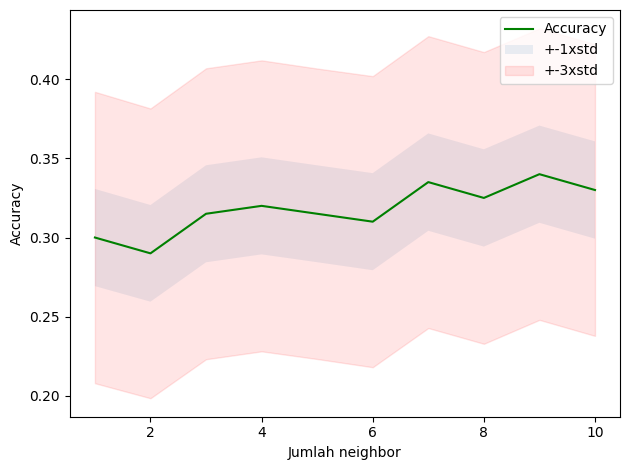

In [22]:
#plot akurasi dari beberapa k
plt.plot(range(1,nk+1),mean_acc,'g')
plt.fill_between(range(1,nk+1),mean_acc-1*std_acc,mean_acc+1*std_acc,alpha = 0.10)
plt.fill_between(range(1,nk+1),mean_acc-3*std_acc,mean_acc+3*std_acc,alpha = 0.10, color = "red")
plt.legend(('Accuracy', '+-1xstd', '+-3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Jumlah neighbor')
plt.tight_layout()
plt.show()

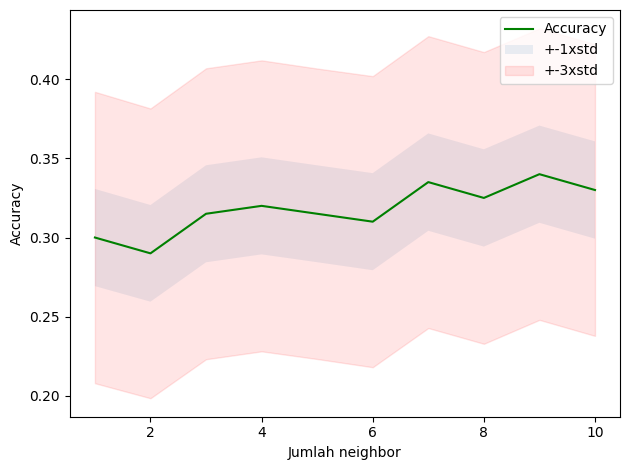

In [ ]:
#plot akurasi dari beberapa k
plt.plot(range(1,nk+1),mean_acc,'g')
plt.fill_between(range(1,nk+1),mean_acc-1*std_acc,mean_acc+1*std_acc,alpha = 0.10)
plt.fill_between(range(1,nk+1),mean_acc-3*std_acc,mean_acc+3*std_acc,alpha = 0.10, color = "red")
plt.legend(('Accuracy', '+-1xstd', '+-3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Jumlah neighbor')
plt.tight_layout()
plt.show()

In [23]:
#k terbaik beserta hasilnya
print("akurasi terbaik model adalah", mean_acc.max(), "dengan jumlah k=", mean_acc.argmax()+1)

akurasi terbaik model adalah 0.34 dengan jumlah k= 9


Daripada cara manual, kita bisa menggunakan fitur *grid search* dari scikit-learn.

In [37]:
from sklearn.model_selection import GridSearchCV

Buatlah *dictionary* berisi semua nilai yang ingin dicoba untuk tiap parameter:

In [42]:
KNN_param_grid = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

In [54]:
KNN_auto = KNeighborsClassifier()

KNN_grid_search = GridSearchCV(KNN_auto, KNN_param_grid, scoring="accuracy")

In [44]:
# Lakukan grid search
KNN_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

Lihat hasilnya:

In [53]:
print(KNN_grid_search.best_params_)

{'n_neighbors': 9}


In [52]:
print(KNN_grid_search.best_score_)

0.34500000000000003


Sehingga nilai k terbaik (dari 1 sampai 10) adalah 9 dengan akurasi 0.345

## Clustering

- Termasuk dalam kategori unsupervised learning (data tidak memiliki label)
- Mengelompokkan data data dengan sifat/karakteristik yg sama sebagai satu cluster
- Cluster : sekelompok objek yang memiliki kesamaan dengan objek yang ada di cluster tersebut dan berbeda dengan objek di cluster lainnya
- Aplikasi : rekomendasi film/musik pada aplikasi, iklan pada sosmed, dll.

![](./gambar/clustering.jpg)

### K-Means Clustering

K-Means bertujuan memperkecil jarak antar data (SSE) dalam cluster dan memperbesar jarak antar cluster

> $$SSE = \sum (x_i -c_j)^2$$

**Langkah-Langkah:**
1. Tentukan centroid untuk k cluster
2. Hitung jarak tiap data dengan centroid
3. Assign data ke centroid terdeka
4. Tentukan centroid baru
5. Ulangi langkah 1 - 4

## K-means Clustering menggunakan dataset random

Contoh K-Means clustering menggunakan data random.

In [3]:
#import modul yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

### Data

In [56]:
#data
np.random.seed(0)

In [58]:
#membuat sample, dengan centroid sebagai berikut
X, y = make_blobs(n_samples= 5000, centers = [[4,4],[-2,-1],[2,-3],[1,1]], cluster_std=0.9)

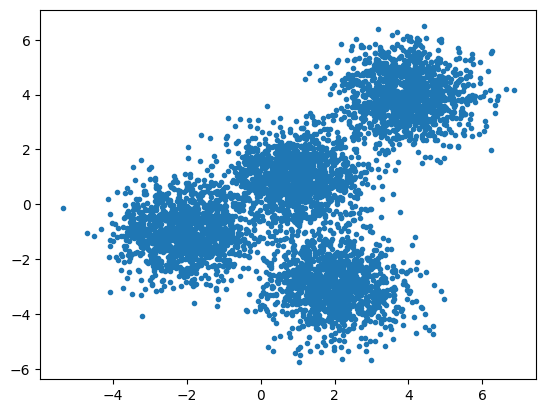

In [59]:
#menggambar plot dari sample
plt.scatter(X[:,0], X[:,1],marker='.')

### Membuat model

In [60]:
#buat model k-means, jumlah cluster 4, algoritma akan diulang sebanyak 12 kali
k_means = KMeans(init="k-means++", n_clusters = 4, n_init = 12)

In [61]:
#fitting x ke model
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

### Output hasil clustering

In [62]:
#hasil clustering pada data
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0], dtype=int32)

In [63]:
#centroid dari 4 cluster setelah menggunakan model k-means
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

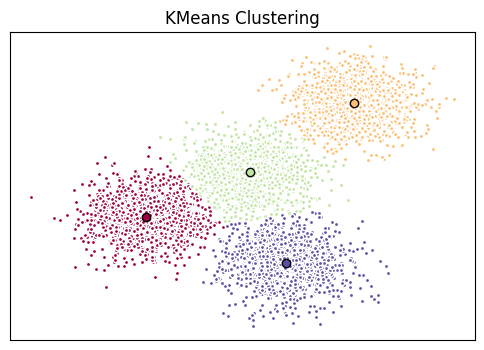

In [64]:
#plot hasil clustering
fig = plt.figure(figsize=(6,4))
colors = plt.cm.Spectral(np.linspace(0,1, len(set(k_means_labels))))
ax= fig.add_subplot(1,1,1)
for k, col in zip(range(len([[4,4],[-2,-1],[2,-3],[1,1]])), colors) :
 my_members = (k_means_labels==k)
 cluster_center = k_means_cluster_centers[k]
 ax.plot(X[my_members,0], X[my_members,1], 'w', markerfacecolor=col,marker='.')
 ax.plot(cluster_center[0],cluster_center[1],'o',markerfacecolor=col,markeredgecolor='k',markersize=
6)
ax.set_title('KMeans Clustering')
#hilangkan sumbu
ax.set_xticks(())
ax.set_yticks(())
plt.show()

## K-Means Clustering menggunakan dataset (csv)

Pada contoh ini, akan dilakukan clustering menggunakan dataset nasabah bank (`Cust_Segmentation.csv`). 

- [Direct link (langsung dari GitHub Pages ini)](./Cust_Segmentation.csv)
- Kaggle: <https://www.kaggle.com/datasets/sam1o1/cust-segmentation>

Nasabah tersebut akan dikelompokkan menjadi 3 cluster.

In [13]:
#import modul dan membaca dataset
import pandas as pd
cust_df = pd.read_csv('./Cust_Segmentation.csv')

### Data

In [14]:
#cuplikan dataset
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [15]:
#periksa tipe data dari masing masing kolom pada dataset
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


### Preprocessing, dan standarisasi

In [16]:
#buat semua data menjadi numerik
cust_df2 = cust_df.drop('Address',axis=1)
cust_df2.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [17]:
cust_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


Selain normalisasi, ada yang namanya standarisasi, yang mengubah data supaya rata-ratanya adalah nol dan simpangan baku / *standard deviation* bernilai satu.

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
X = cust_df2.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet= StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

### Membuat model

In [20]:
#modelling
clusterNum = 3
k_means_cust = KMeans(init = 'k-means++', n_clusters= clusterNum, n_init = 12) 
#3 cluster, dengan running algoritma sebanyak 12 kali

k_means_cust.fit(X)

#hasil clustering
labels_cust = k_means_cust.labels_
print(labels_cust)

[2 0 2 2 1 0 2 0 2 0 0 2 2 2 2 2 2 2 0 2 2 2 2 0 0 0 2 2 0 2 0 2 2 2 2 2 2
 2 2 0 2 0 2 1 2 0 2 2 2 0 0 2 2 0 0 2 2 2 0 2 0 2 0 0 2 2 0 2 2 2 0 0 0 2
 2 2 2 2 0 2 0 0 1 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 0 2 0 2
 2 2 2 2 2 2 0 2 0 0 2 0 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 0 2
 2 2 2 2 0 2 2 0 2 0 2 2 0 1 2 0 2 2 2 2 2 2 1 0 2 2 2 2 0 2 2 0 0 2 0 2 0
 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 1 0 2 2 2 2 2 2 2 0 2 2 2 2
 2 2 0 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 0 2 0 2 0 0 2 2 2 2 2 2
 2 2 2 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 0 2 0 0 2
 2 2 2 2 0 2 2 2 2 2 2 0 2 2 0 2 2 0 2 2 2 2 2 0 2 2 2 1 2 2 2 0 2 0 0 0 2
 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 0 2 2 0 2 2 2 2 0 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 1
 2 2 2 2 2 2 0 2 2 2 1 2 2 2 2 0 2 1 2 2 2 2 0 2 0 0 0 2 2 0 0 2 2 2 2 2 2
 2 0 2 2 2 2 0 2 2 2 0 2 

Metrik evaluasi untuk *clustering*, salah satunya bisa berupa hasil SSE (makin kecil makin baik), yang bisa dilihat dengan `.inertia_`

In [21]:
print(k_means_cust.inertia_)

381849.3821502842


Menyimpan hasil *clustering* ke dalam CSV:

In [22]:
#menambahkan kolom hasil clustering pada dataset
cust_df2['Clus_km'] = labels_cust
cust_df2.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,2
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,2
3,4,29,2,4,19,0.681,0.516,0.0,6.3,2
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


In [23]:
cust_df2.to_csv("./Cust_Segmentation_clusters.csv")

Eksplorasi hasil *clustering*:

In [24]:
#melihat rata rata per cluster
cust_df2.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590
1,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
2,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761


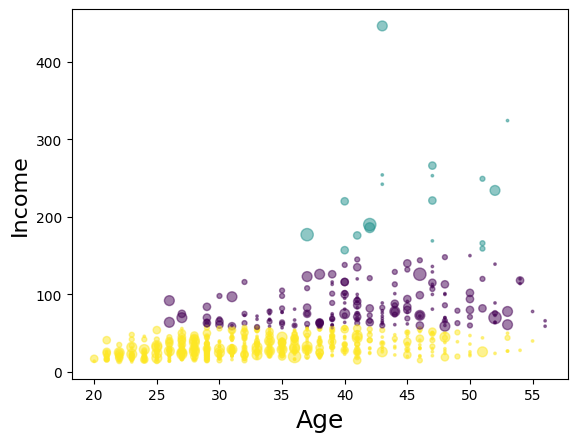

In [25]:
#plot hasil clustering berdasarkan age dan income
area = np.pi * (X[:, 1])**2
plt.scatter(X[:,0],X[:,3],s = area, c = labels_cust.astype(float), alpha=0.5)
plt.xlabel('Age',fontsize=18)
plt.ylabel('Income',fontsize = 16)
plt.show()

### Kesimpulan

Dari datset diatas, kita dapat membuat 3 cluster, dengan segmentasi sebagai berikut: 

- Kuning : dewasa muda, pendapatan rendah 
- Ungu: dewasa menengah, pendapatan kelas menengah 
- Hijau: dewasa tua, pendapatan tinggi